<a href="https://colab.research.google.com/github/christianloring/Projects/blob/main/capstone_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set I am going to be using is an IBM data set gathered from their employees. The data set and types of information gathered can be viewed either below or at the following: 

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset



Overview of what we want to do:
talk about the importance of employee retention, show entire data, create hypothesis and why, get the data we are interested in, perform tests, analyze results,  recommendations and future investigations. 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Gather the data and see its columns

In [ ]:
employee_data = pd.read_csv('gdrive/My Drive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_data.info

<bound method DataFrame.info of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

I prefer to view the columns as a list in general, but also we cannot see all of the columns above. We see that our data set is quite large, at 1470 employees.

In [ ]:
employee_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

I am going to investigate if there is a difference between males and females in terms of job satisfaction. This is because there are studies having shown that women are promoted slower and are often overqualified for jobs they apply for, so I want to see if there is a difference in how happy the genders are. Although the cause may be different, finding out that something is dissatisfying up to 50% of the population would have a large impact on employee retention, saving IBM money in the long term for hiring costs, as well as making their company more appealing due to having a large number of people be more satisfied with their jobs.

DescribeResult(nobs=1470, minmax=(1, 4), mean=2.7285714285714286, variance=1.2162695711368277, skewness=-0.3293354633089524, kurtosis=-1.2221182660739298)


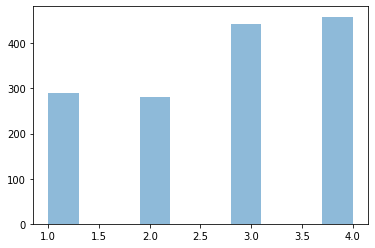

In [ ]:
plt.hist(employee_data['JobSatisfaction'], alpha = 0.5)
print(stats.describe(employee_data['JobSatisfaction']))

We can see the data has only 4 columns and is not continuous, hence we will use a non-parametric test. Although the skewness and kurtosis is fine, we do not have continuity. 

Our null hypothesis will be that there is no difference in job satisfaction between males and females.

Our alternative hypothesis is that there is a difference in job satisfaction between males and females.

Our alpha will be 0.10

First we split the data into the 2 categories we are interested in.

In [ ]:
girls = employee_data[employee_data['Gender'] == 'Male']
boys = employee_data[employee_data['Gender'] == 'Female']
girls.info


<bound method DataFrame.info of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
4      27        No  ...                       2                     2
5      32        No  ...                       3                     6
7      30        No  ...                       0                     0
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[882 rows x 35 columns]>

View the newly split data of boys/girls relative to what we are interested in, job satisfaction.

(array([119.,   0.,   0., 118.,   0.,   0., 181.,   0.,   0., 170.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

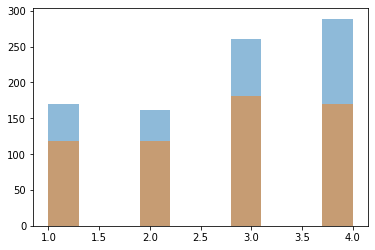

In [ ]:
plt.hist(girls['JobSatisfaction'], alpha = 0.5)
plt.hist(boys['JobSatisfaction'], alpha = 0.5)

Visually it seems like there may be a difference. 3 > 4 > 1 = 2, girls are 4 > 3 > 1 > 2, but let's see what the test says. We will use a Mann-Whitney U Test as our nonparametric test

In [ ]:
stats.mannwhitneyu(girls['JobSatisfaction'], boys['JobSatisfaction'])

MannwhitneyuResult(statistic=248820.5, pvalue=0.0860584779427192)

p = 0.086 < 0.10 = alpha, so we reject the null. That is, we can say there is a difference in job satisfaction between men and women at IBM with 90% confidence. This is worth investigating because from our data set, 62% of employees are women, so investigating what the cause of this difference in satisfaction is will help with employee retention, therefore saving money in training costs, having higher productivity because of having employees who are more experienced, and being more appealing as a company because your employees speak more highly of them.